In [9]:
! pip install cupy --no-cache-dir -vvvv

Created temporary directory: /tmp/pip-ephem-wheel-cache-kdjrz97t
Created temporary directory: /tmp/pip-req-tracker-2xcgdxi2
Created requirements tracker '/tmp/pip-req-tracker-2xcgdxi2'
Created temporary directory: /tmp/pip-install-65plrg39
1 location(s) to search for versions of cupy:
* https://pypi.org/simple/cupy/
Getting page https://pypi.org/simple/cupy/
Found index url https://pypi.org/simple
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/cupy/ HTTP/1.1" 200 6458
Analyzing links from page https://pypi.org/simple/cupy/
  Found link https://files.pythonhosted.org/packages/79/e5/c7febd2964bf5e319423045e440ef43ad3aad2dcbe347854e1ad6cc6485a/cupy-1.0.0a1.tar.gz#sha256=4d929ee339ead4709ff809ba2e2544d7f0744d2b8466c9ea7fd803a6c781ac85 (from https://pypi.org/simple/cupy/), version: 1.0.0a1
  Found link https://files.pythonhosted.org/packages/4f/ee/0209b0288d43cb277715c9fbd91cd232e5f7f07895c78e9e75a9d6ad25ec/cupy-1.0.0b1.tar.gz#sha256=6b0f88532f8c9c28f608cc

In [7]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install 'cupy-cuda80==4.0.0b4' 'chainer==4.0.0b4'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
     |████████████████████████████████| 205.4MB 67kB/s 
     |████████████████████████████████| 378kB 37.7MB/s 
  Created wheel for chainer: filename=chainer-4.0.0b4-cp36-none-any.whl size=562409 sha256=0613429f03aab1c357fa5a627b1112fdc41f49d1813e8249c4240a93e0be6bbe
  Stored in directory: /root/.cache/pip/wheels/89/2e/12/fe6441d846a967c24ded700e140bc2a71f56044199b72f33dc
Successfully built chainer
  Found existing installation: cupy-cuda80 7.5.0
    Uninstalling cupy-cuda80-7.5.0:
      Successfully uninstalled cupy-cuda80-7.5.0
  Found existing installation: chainer 6.5.0
    Uninstalling chainer-6.5

Максимальное число итераций: 1000


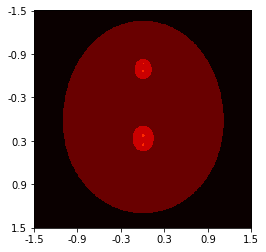

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cupy as cp

# Задаем ширину и высоту графика; начальные параметры (макс. значение z; число итераций и т.д.) 
im_width, im_height = 500, 500
zabs_max = 100
nit_max = int(input("Максимальное число итераций: ")) # остальные парамеры можно настроить вручную по усмотрению 
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

# Собственно алгоритм 
julia = cp.zeros((im_width, im_height))
for ix in range(im_width):
    for iy in range(im_height):
        nit = 0
        # Сопоставляем позиции пикселей и точки на комплексной плосткости
        z = complex(ix / im_width * xwidth + xmin, iy / im_height * yheight + ymin)
        # Выполним итерации
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**2 - 8*z + 2 # Для отображения классического случая функцию нужно заменить на z = z**2 + c и прописать комплексное число c 
            nit += 1
        shade = 1-cp.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[ix,iy] = ratio

# Переведем получившийся список из cp.array в np.array, чтобы было легче рисовать (т.к. расчеты выполнялись на CuPy)
julia_np = cp.asnumpy(julia)

# Построим график
fig, ax = plt.subplots()
ax.imshow(julia_np, interpolation='nearest', cmap=cm.hot)
xtick_labels = np.linspace(xmin, xmax, int(xwidth / 0.5))
ax.set_xticks([(x-xmin) / xwidth * im_width for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])
ytick_labels = np.linspace(ymin, ymax, int(yheight / 0.5))
ax.set_yticks([(y-ymin) / yheight * im_height for y in ytick_labels])
ax.set_yticklabels(['{:.1f}'.format(ytick) for ytick in ytick_labels])

# Выведем график 
plt.show()

# Сохраним график
plt.savefig('julia_set.png', bbox_inches='tight', pad_inches=0.02)